# Exploratory Data Analysis (EDA) on Houses Prices in Ames, Iowa
## by Yuxiang Wu

## Investigation Overview

> This presentation is to demonstrate the factors that affact the houses prices in Ames, Iowa.

## Dataset Overview

> The dataset used for this presentation contains information of 1460 houses with 81 variables on each house, including neighborhoods, living areas, building types, lot size, and many others. The original dataset was downloaded from a Kaggle competition which was to challenge participants to predict the final price of each home in Ames, Iowa. The complete downloaded file contains two sets of data for testing and training respectively. The dataset I will be working on is the one for training, as it contains the sale price for each house.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_house = pd.read_csv('house_cleaned.csv')

## House price and house areas

The plot suggests that there is a positive correlation between sale price and total living area, and most houses have listing prices under 300,000 with total living area less than 2500 square feet. There is also a positive relation between sale price and basement area, and the basement areas of most houses in the City of Ames are in between 500 to 2000 square feet.

<Figure size 720x360 with 0 Axes>

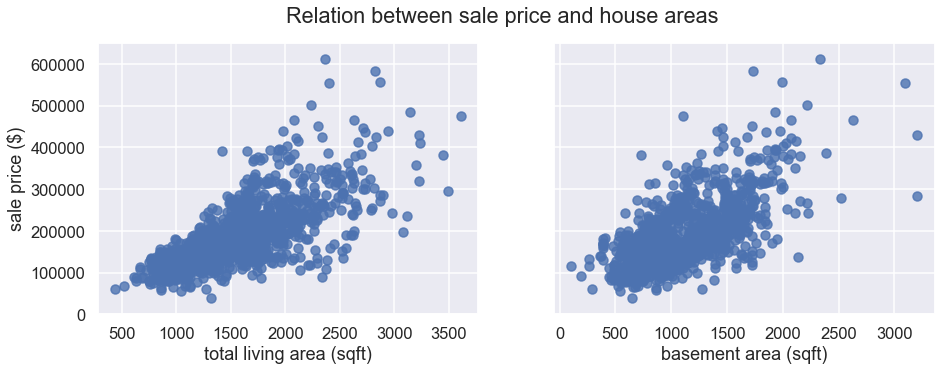

In [12]:
# create scatter plot with dull data for for sale price, total living area, and basement area
sns.set()
sns.set_context('talk')
fig = plt.figure(figsize=(10,5))
sns.set_context('talk')
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = [15, 5])
fig.subplots_adjust(top=0.85, wspace=0.4)
plt.suptitle('Relation between sale price and house areas')

ax1.scatter(data = df_house, x = 'total_living_area', y = 'sale_price', alpha = 8/10)
ax1.set(xlabel='total living area (sqft)', ylabel='sale price ($)')

ax2.scatter(data = df_house, x = 'bsmt_area', y = 'sale_price', alpha = 8/10)
ax2.set(xlabel='basement area (sqft)')
plt.show();

## Sales, House Condition, and Neighborhood

Interestingly, sale price does not associate with house condition ratings. Instead, the three neighborhoods with highest sale prices only have a average house condition rating. The three most expensive neighborhoods are NoRidge, NridgHt, and StoneBr. The three neighborhoods with highest house condition ratings are Crawfor, OldTown, and Veenker. Next, I will take a deeper look at the houses in the three most expensive neighborhoods.

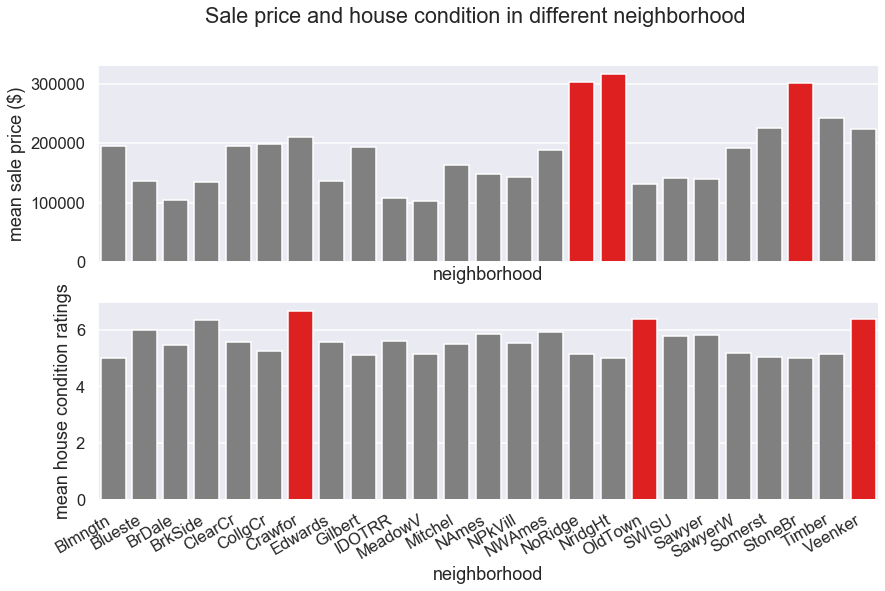

In [21]:
# create a new dataframe for related variables
df_neighbour = df_house [['neighborhood', 'sale_price', 'house_condition']]
df_neighbour = df_neighbour.groupby(['neighborhood']).mean()
df_neighbour = pd.DataFrame({'neighborhood': df_neighbour.index,
                             'sale_price_mean': df_neighbour.sale_price.values,
                             'house_condition_mean': df_neighbour.house_condition.values})

# create two barcharts sharing a same x-axis
f, axarr = plt.subplots(2, sharex=True, figsize = [14, 8])
sns.set_context('talk')
plt.suptitle('Sale price and house condition in different neighborhood')

# highlight the neighborhoods with top three sale price
clrs1 = ['grey' if (x < df_neighbour['sale_price_mean'].nlargest(3).iloc[-1]) else 'red' for x in df_neighbour['sale_price_mean'].values ]
ax1 = sns.barplot(x='neighborhood', y='sale_price_mean', data=df_neighbour, palette=clrs1, ax=axarr[0])
ax1.set(xlabel='neighborhood', ylabel='mean sale price ($)')

# highlight the neighborhoods with top three house condition ratings
clrs2 = ['grey' if (x < df_neighbour['house_condition_mean'].nlargest(3).iloc[-1]) else 'red' for x in df_neighbour['house_condition_mean'].values ]
ax2 = sns.barplot(x='neighborhood', y='house_condition_mean', data=df_neighbour, palette=clrs2, ax=axarr[1])
ax2.set(xlabel='neighborhood', ylabel='mean house condition ratings')
plt.setp(ax2.get_xticklabels(), rotation=30, horizontalalignment = 'right')

plt.show()

## Popular House Types Over Years

The most popular dwelling type in the city of Ames are Single-family Detached. Houses with prices tags over $300,000 are mostly Single-family Detached. The Two-family Conversion type of house disappeared from the market after 1970. Duplex became less popular after 1980. In general, Townhouse End Units are more expensive than Townhouse Inside Units

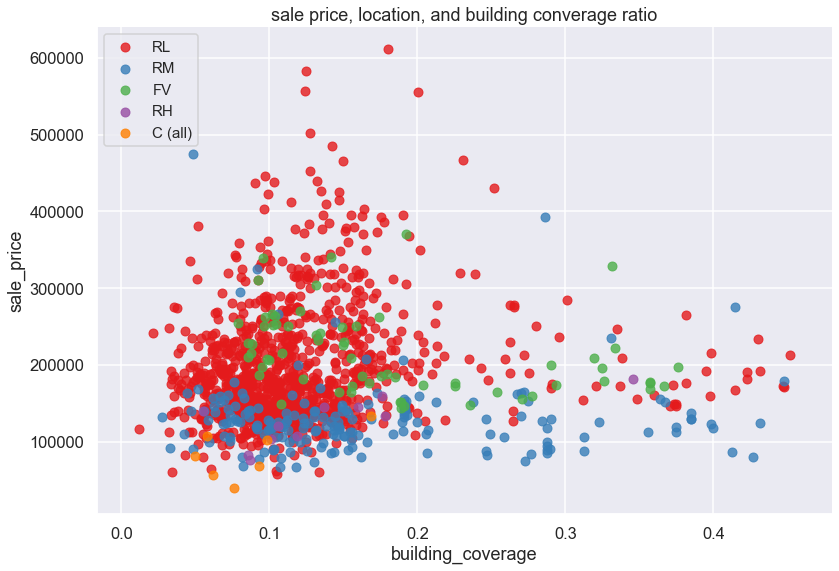

In [22]:
# create a multivariate plot for sale price, building coverage ratio, and zone classification 
sns.set_context('talk')
order = df_house['zone'].value_counts().index.tolist()
g = sns.FacetGrid(data = df_house, hue = 'zone', hue_order = order, height = 8, aspect = 1.5, palette="Set1")
g.map(sns.regplot,"building_coverage", "sale_price", fit_reg = False);
plt.legend(loc=2, fontsize = 15)
plt.title('sale price, location, and building converage ratio');